In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"

from utils import get_hdf_keys
from train import training
from evaluation import evaluate, get_run_results
import warnings
import pickle
warnings.filterwarnings('ignore')
# Set seed
np.random.seed(42)

In [2]:
# Set working directory
import wandb
wandb.login()

os.chdir(r"..") # should be the git repo root directory, checking below:
print("Current working directory: " + os.getcwd())
assert os.getcwd()[-8:] == "WattCast"
dir_path = os.path.join(os.getcwd(), 'data', 'clean_data')
model_dir = os.path.join(os.getcwd(), 'models')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: nikolaushouben (wattcast). Use `wandb login --relogin` to force relogin


Current working directory: c:\Users\nik\Desktop\Berkeley_Projects\WattCast


In [3]:
locations_dict, resolutions_dict = get_hdf_keys(dir_path)

In [4]:
locations_dict

{'2_town.h5': ['GLENDOVEER-13596',
  'GLENDOVEER-13597',
  'GLENDOVEER-13598',
  'GLENDOVEER-13599',
  'GLENDOVEER-CLIFFGATE',
  'GLENDOVEER-NORTHEAST',
  'KELLY',
  'LENTS-13101',
  'LENTS-HAPPY',
  'LENTS-MT',
  'LENTS-NORTH',
  'MIDWAY-DIVISION',
  'MIDWAY-DOUGLAS',
  'MIDWAY-LYNCH',
  'MIDWAY-POWELLHURST',
  'RAMAPO-EMERALD',
  'RAMAPO-GILBERT',
  'RAMAPO-RAMAPO']}

### Loop through all locations and resolutions

In [ ]:

for location in locations_dict['2_town.h5']:

    init_config = {
        'spatial_scale': "2_town",
        'temp_resolution': 60,
        'location': location,
        'models_to_train': ["rf", "xgb"],
        'horizon_in_hours': 24,
        'lookback_in_hours': 24,
        'boxcox': True,
        'liklihood': None,
        'weather_available': True,
        'datetime_encodings': True,
        'heat_wave_binary': True,
        'datetime_attributes': ["dayofweek", "week"],
        'use_cov_as_past_cov': False,
    }

    name_id = (
        init_config["spatial_scale"]
        + "_"
        + init_config["location"]
        + "_"
        + str(init_config["temp_resolution"])
        + "min"
    )
    wandb.init(
        project="Portland_AMI", name=name_id, id=name_id
    ) 

    config, models = training(init_config)

    eval_dict = evaluate(config, models)

    df_metrics = get_run_results(eval_dict, config)

    wandb.finish()

### Run for a single location

wandb: Sorting runs by -summary_metrics.eval_loss


Fetched sweep with name resilient-sweep-2 for model xgb
Getting model instance for xgb...
Initializing kwargs for sklearn-API type model xgb...
Getting model instance for linear regression...
Directory already exists: c:\Users\nik\Desktop\Berkeley_Projects\WattCast\data\evaluations\2_town
No existing evaluation found, running evaluation...
Testing on Summer data
Generating historical forecasts with XGBModel
Generating historical forecasts with LinearRegressionModel
Calculating error metrics
Plotting side-by-side comparison of predictions and the ground truth
Plotting error metric trajectory
Plotting error distribution
Plotting daily sum of the predictions and the ground truth


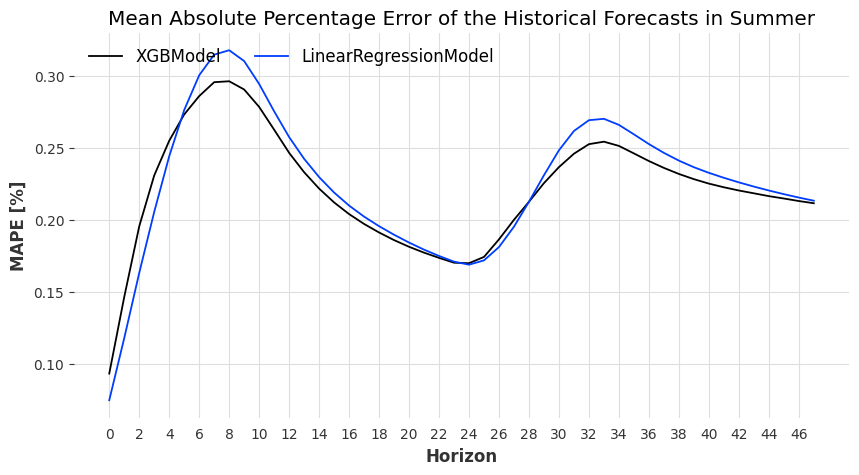

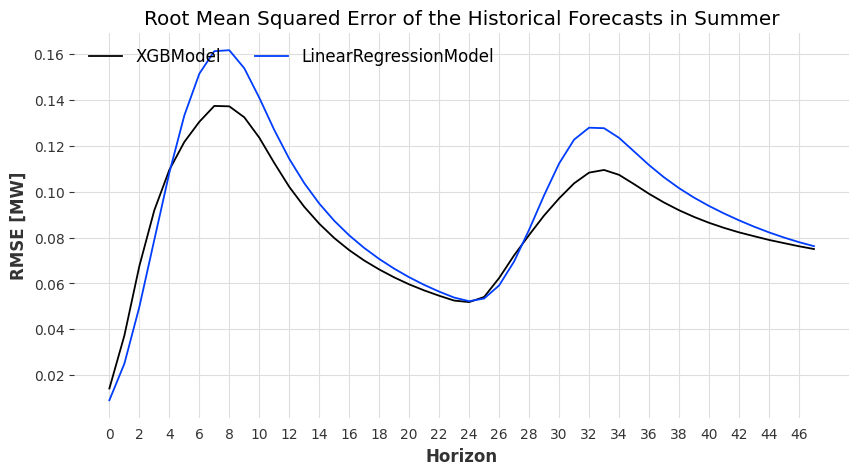

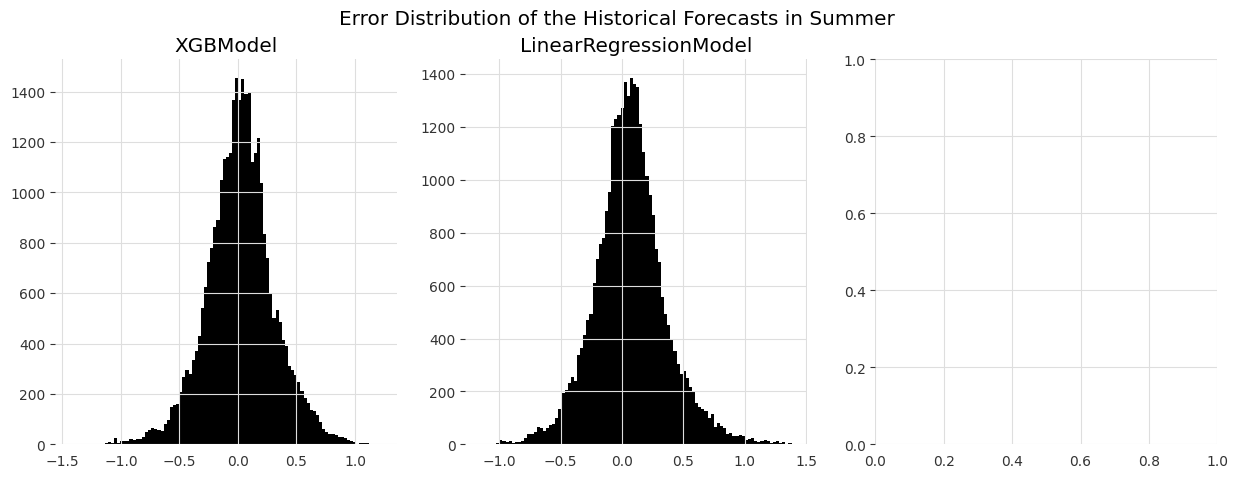

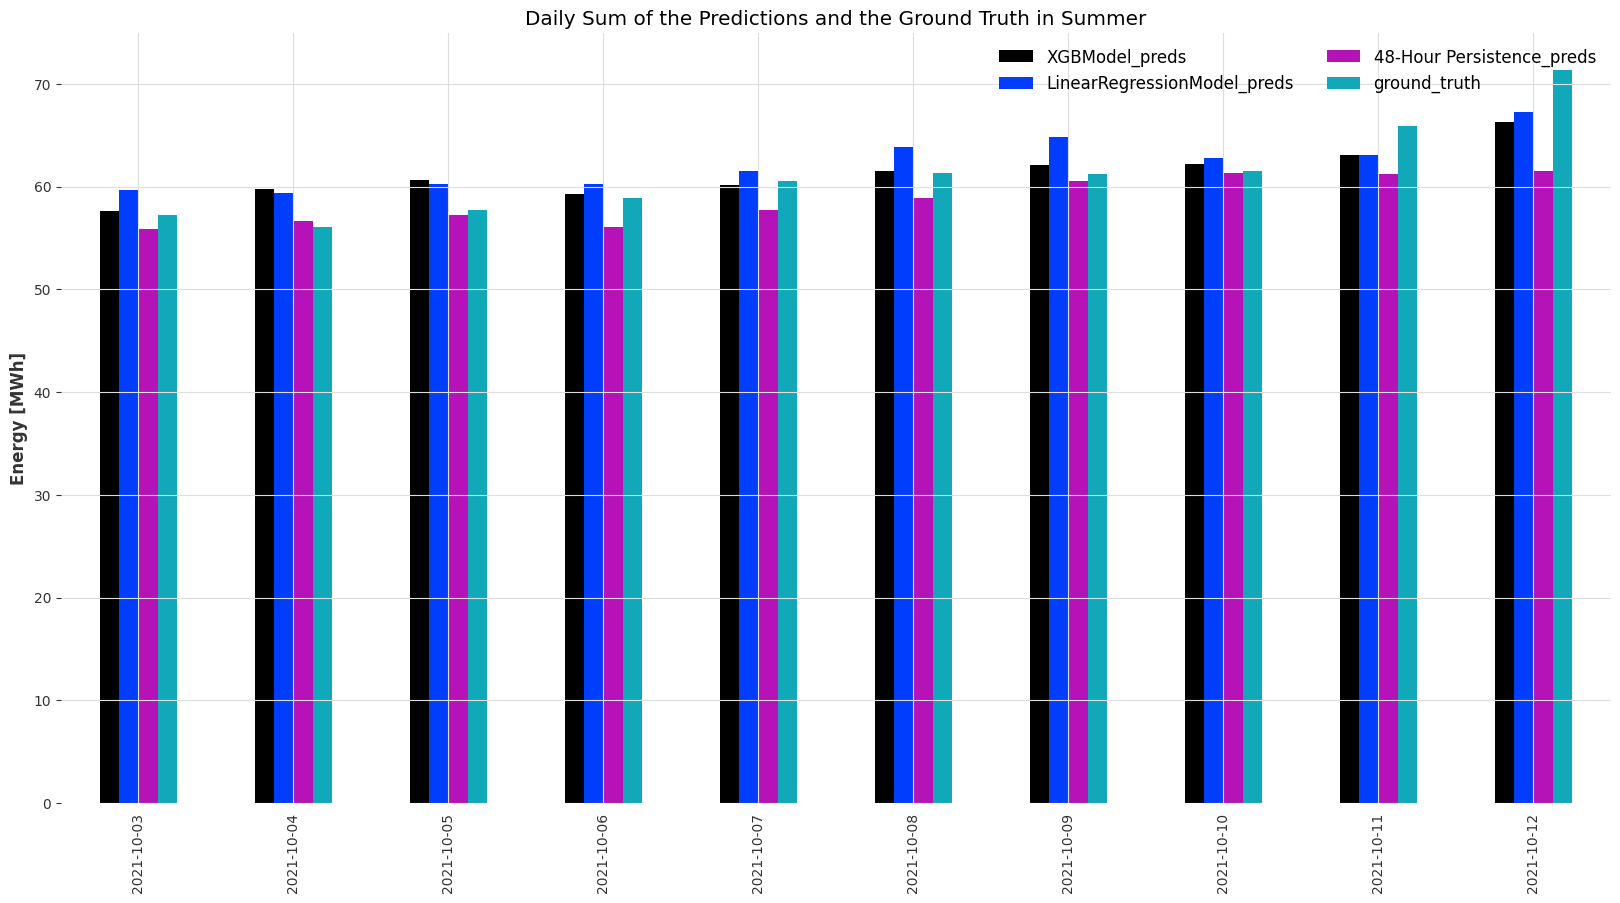

In [6]:
init_config = {
    'spatial_scale': "2_town",
    'temp_resolution': 60,
    'location': 'GLENDOVEER-13598',
    'models_to_train': ["xgb"],
    'horizon_in_hours': 48,
    'lookback_in_hours': 24,
    'boxcox': True,
    'liklihood': None,
    'weather_available': True,
    'datetime_encodings': True,
    'heat_wave_binary': True,
    'datetime_attributes': ["dayofweek", "week"],
    'use_cov_as_past_cov': False,
}

name_id = (
    init_config["spatial_scale"]
    + "_"
    + init_config["location"]
    + "_"
    + str(init_config["temp_resolution"])
    + "min"
)
wandb.init(
    project="Portland_AMI", name=name_id, id=name_id
) 

config, models = training(init_config)

eval_dict = evaluate(config, models)

df_metrics = get_run_results(eval_dict, config)

wandb.finish()

## Debugging